In [ ]:
!wget https://raw.githubusercontent.com/alimbekovKZ/ods_homework/master/data/wiki_machine_learning.csv

--2020-11-09 09:35:08--  https://raw.githubusercontent.com/alimbekovKZ/ods_homework/master/data/wiki_machine_learning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31043 (30K) [text/plain]
Saving to: ‘wiki_machine_learning.csv’

wiki_machine_learni 100%[===================>]  30.32K  --.-KB/s    in 0.01s   

2020-11-09 09:35:08 (2.15 MB/s) - ‘wiki_machine_learning.csv’ saved [31043/31043]



In [ ]:
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()

In [ ]:
from fbprophet import Prophet

In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= prophet_basic.make_future_dataframe(periods=predictions)
future.tail(5)

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [ ]:
forecast=prophet_basic.predict(future)

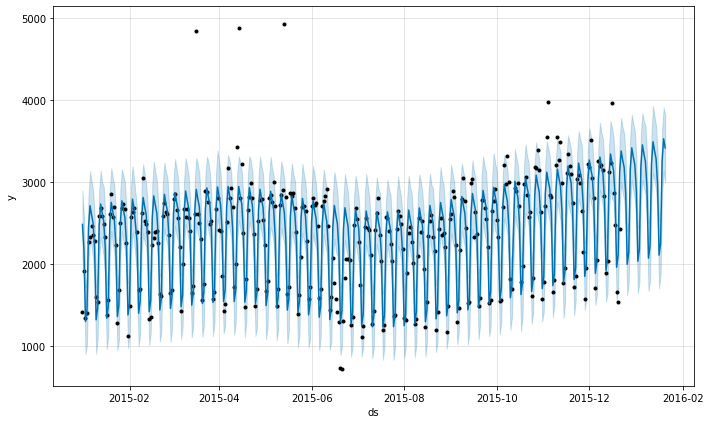

In [ ]:
fig1 =prophet_basic.plot(forecast)

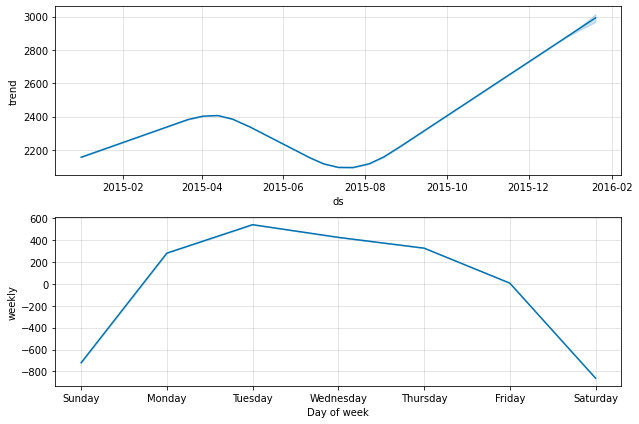

In [ ]:
fig1 = prophet_basic.plot_components(forecast)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
forecast.yhat[353:].shape

(30,)

In [ ]:
preds = forecast.yhat[353:]

test_y = df[353:].y

print(mean_absolute_percentage_error(test_y, preds))

50.01702050627219
